✅ Data loaded successfully.
Numeric Features:
['SeniorCitizen', 'tenure', 'MonthlyCharges']


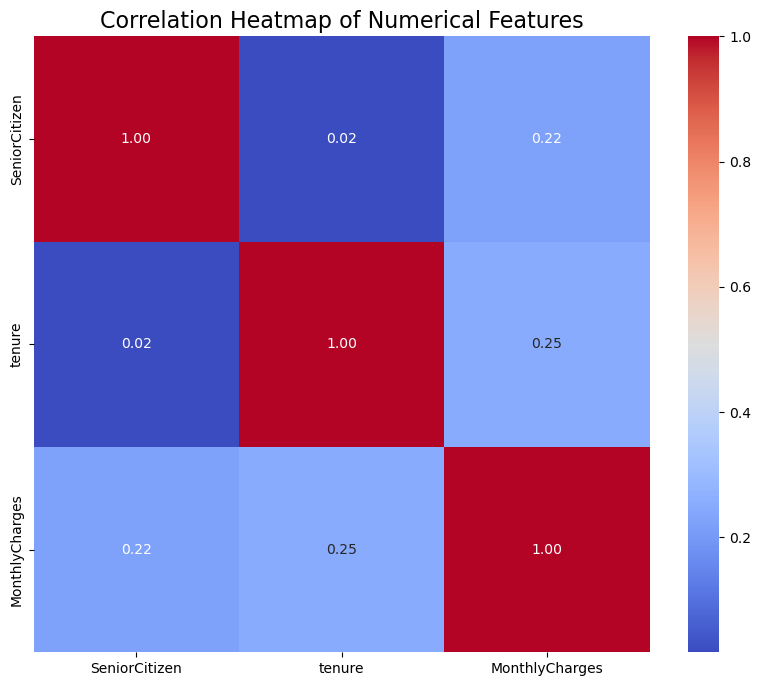

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset
try:
    telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
    raise

# Drop 'customerID' if present and numeric (sometimes read as string)
if 'customerID' in telco_base_data.columns:
    telco_base_data = telco_base_data.drop(columns=['customerID'])

# 1. Identify numeric columns
numeric_features = telco_base_data.select_dtypes(include=['int64', 'float64']).columns
print(f"Numeric Features:\n{numeric_features.tolist()}")

# 2. Compute the correlation matrix
correlation_matrix = telco_base_data[numeric_features].corr()

# 3. Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# 4. Preview dataset
telco_base_data.head()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset shape and column overview
print("Shape of dataset:", telco_base_data.shape)
print("\nColumn names:")
print(telco_base_data.columns.values)

# 2. Data types
print("\nData types:")
print(telco_base_data.dtypes)

# 3. Descriptive statistics for numeric columns
print("\nDescriptive statistics:")
print(telco_base_data.describe())





Shape of dataset: (7043, 20)

Column names:
['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']

Data types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Descriptive statistics:
       SeniorCitizen       tenure  MonthlyCharges

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

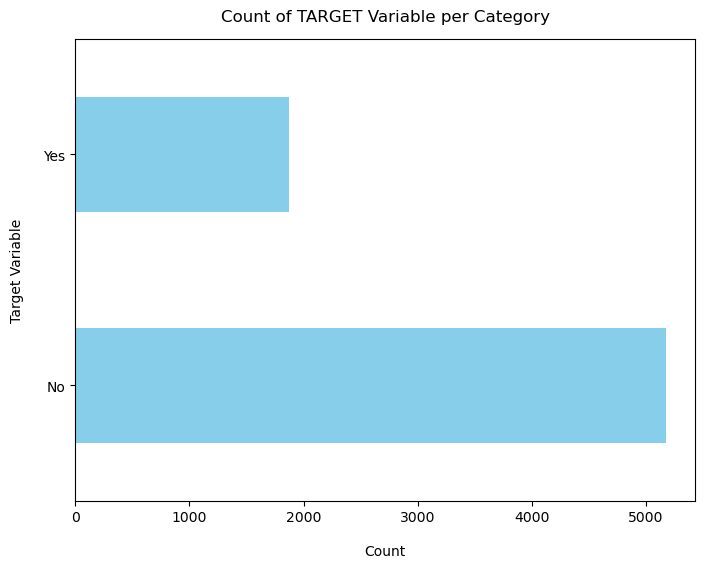


Percentage distribution of target variable:
Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Raw counts of Churn variable:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
# 4. Target variable distribution
plt.figure(figsize=(8, 6))
telco_base_data['Churn'].value_counts().plot(kind='barh', color='skyblue')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)
plt.show()

# 5. Percentage of Churn classes
churn_percent = 100 * telco_base_data['Churn'].value_counts() / len(telco_base_data['Churn'])
print("\nPercentage distribution of target variable:")
print(churn_percent)

# 6. Raw counts of churn classes
print("\nRaw counts of Churn variable:")
print(telco_base_data['Churn'].value_counts())

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.


DataFrame info (full):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     

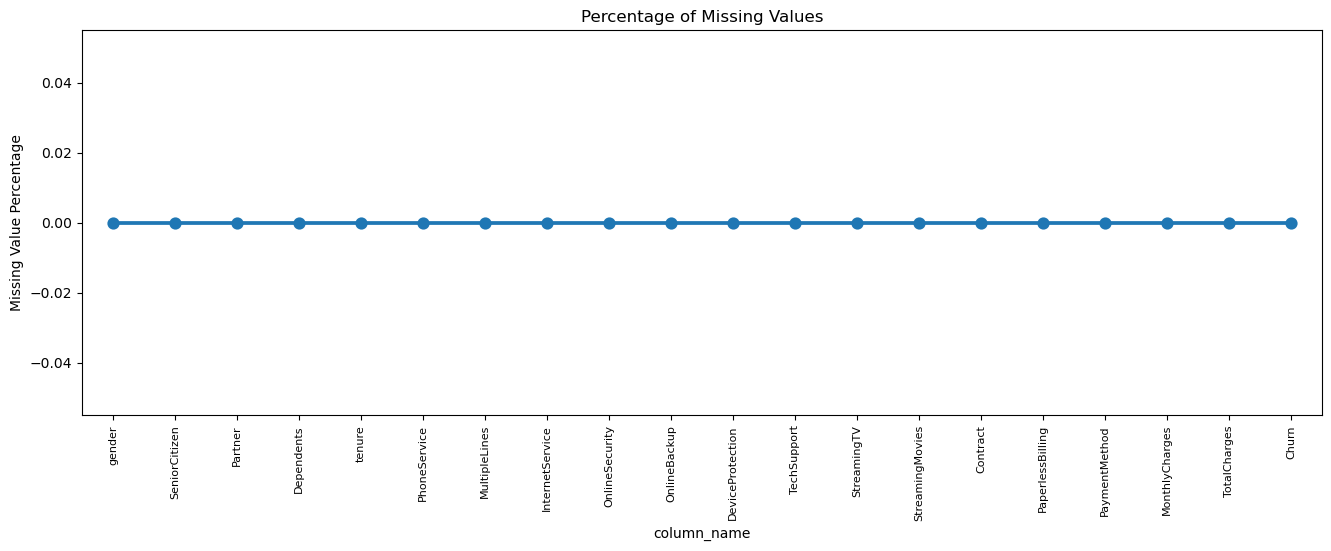

In [9]:

# 7. Full info of the DataFrame (with all columns listed)
print("\nDataFrame info (full):")
telco_base_data.info(verbose=True)

# 8. Missing values percentage
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['column_name', 'missing_percentage']

plt.figure(figsize=(16, 5))
sns.pointplot(x='column_name', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=8)
plt.title("Percentage of Missing Values")
plt.ylabel("Missing Value Percentage")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [14]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [18]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [21]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [25]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [28]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [34]:
# Group the tenure into bins of 12 months and create readable labels
labels = [f"{i} - {i + 11}" for i in range(1, 72, 12)]

# Bin the tenure column into groups (right=False means upper bound is exclusive)
telco_data['tenure_group'] = pd.cut(telco_data['tenure'], bins=range(1, 80, 12), right=False, labels=labels)

# Display the count of customers in each tenure group
print("\nCustomer count per tenure group:")
print(telco_data['tenure_group'].value_counts().sort_index())

# Drop non-predictive or redundant columns
# Drop customerID and tenure only if they exist
telco_data.drop(columns=['customerID', 'tenure'], inplace=True, errors='ignore')


# Preview the cleaned dataset
telco_data.head()



Customer count per tenure group:
tenure_group
1 - 12     2175
13 - 24    1024
25 - 36     832
37 - 48     762
49 - 60     832
61 - 72    1407
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**6.** Removed columns not required for processing

## Data Exploration
1. Plot distibution of individual predictors by churn

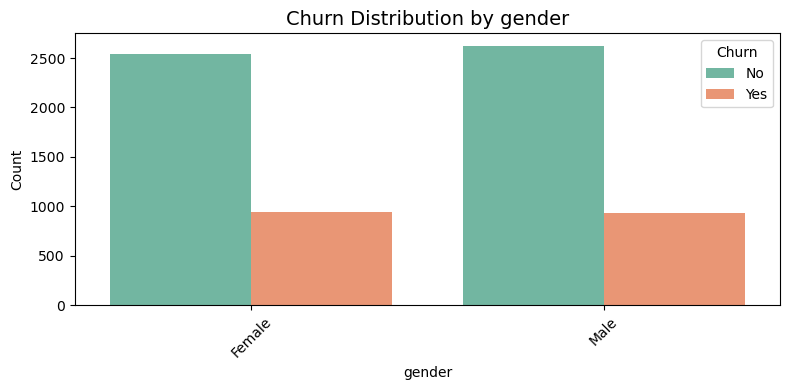

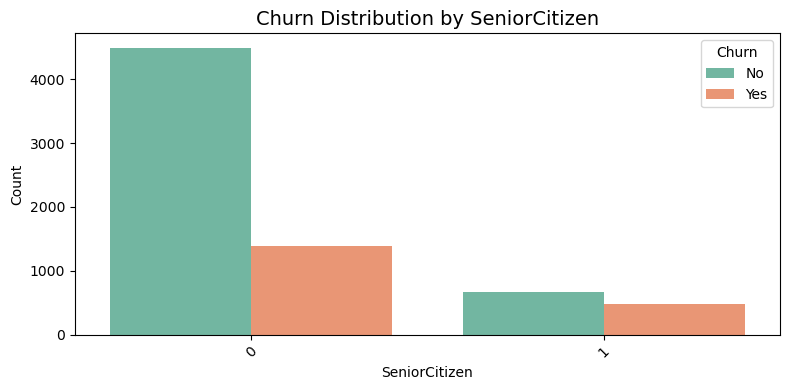

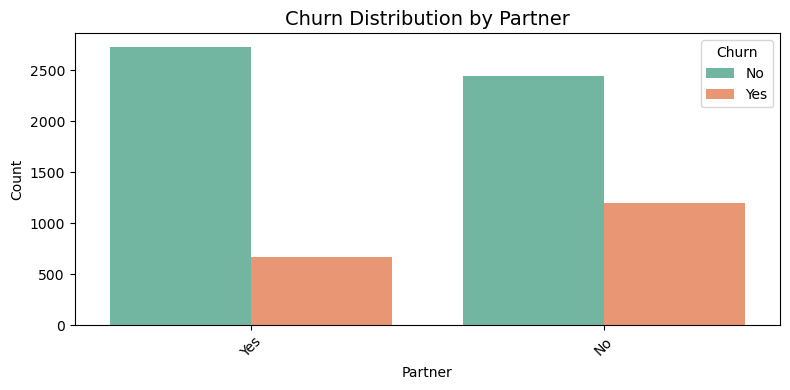

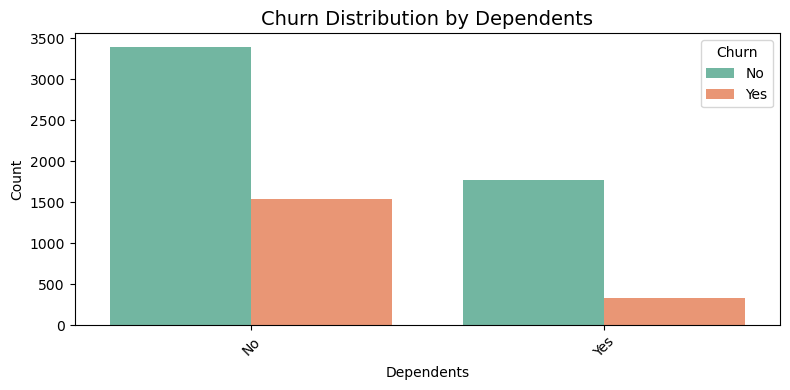

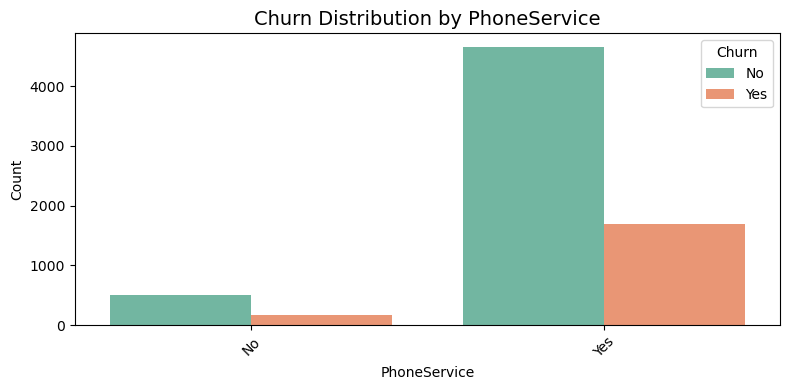

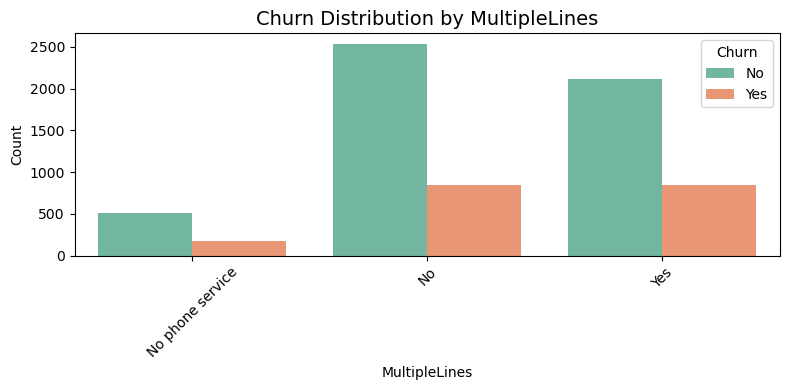

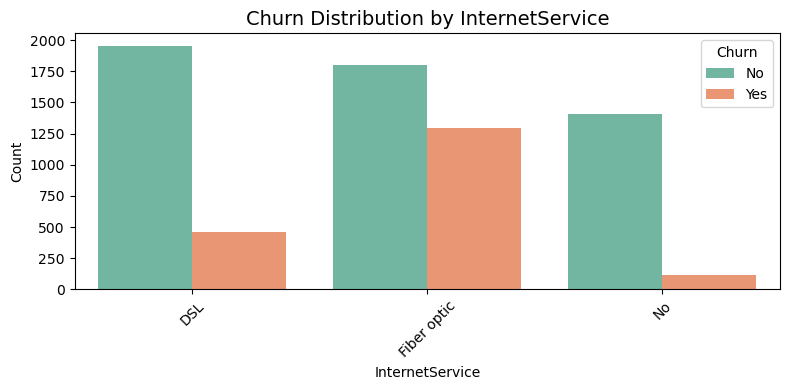

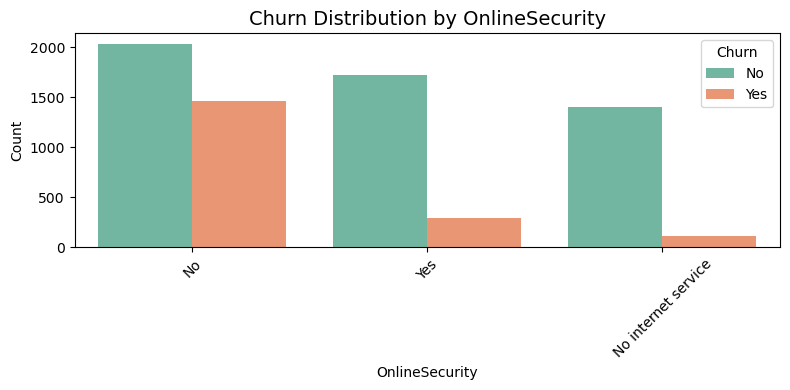

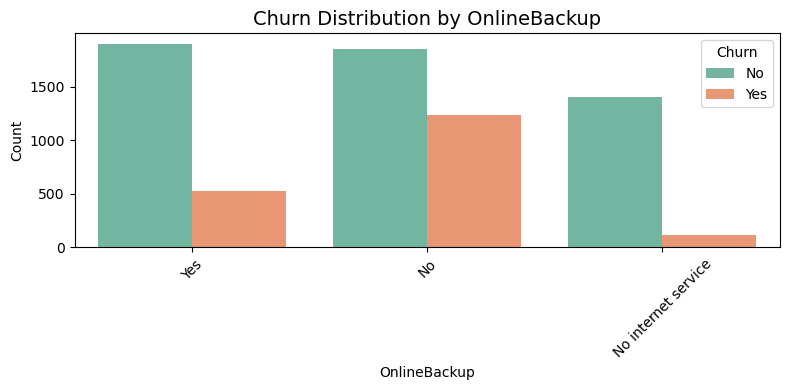

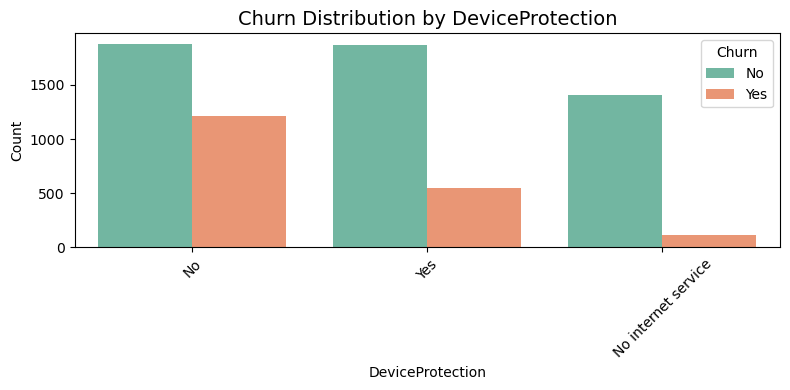

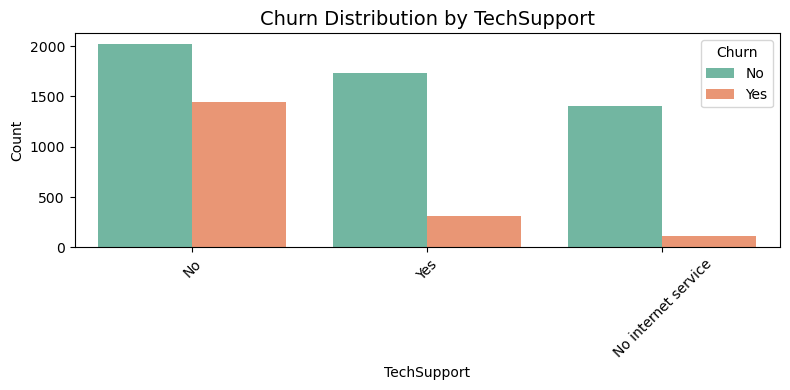

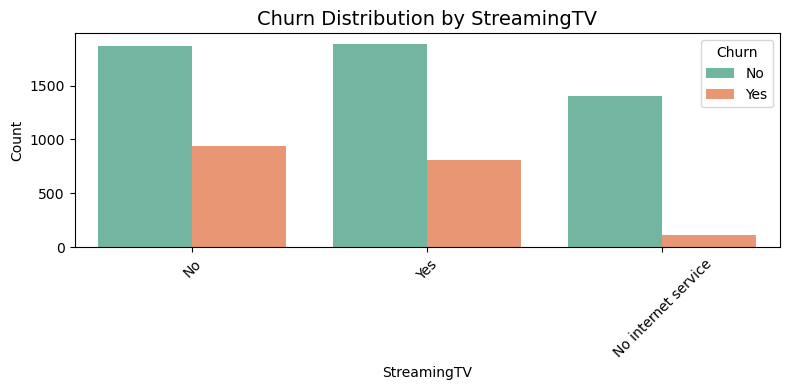

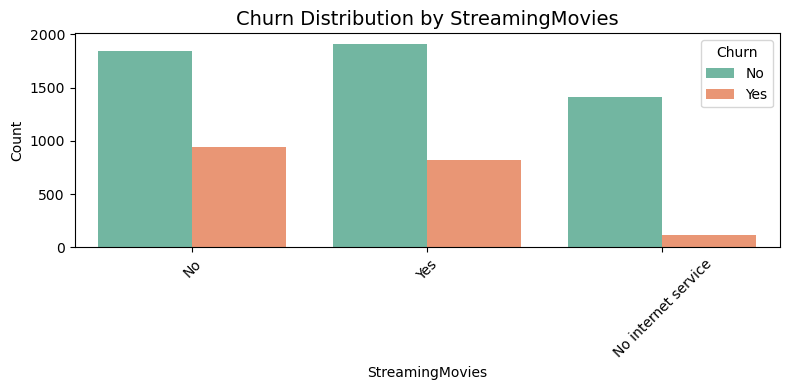

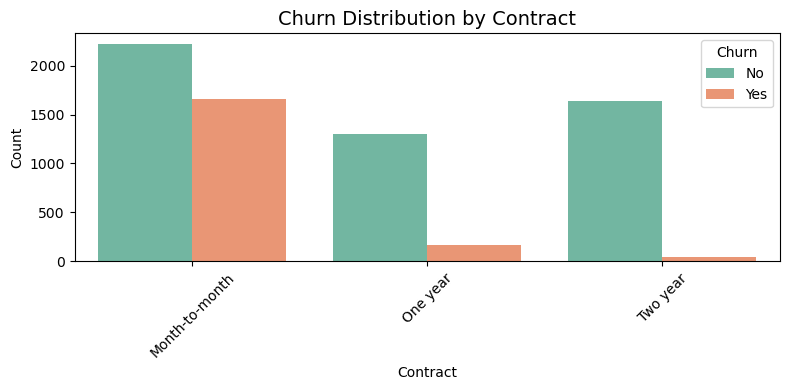

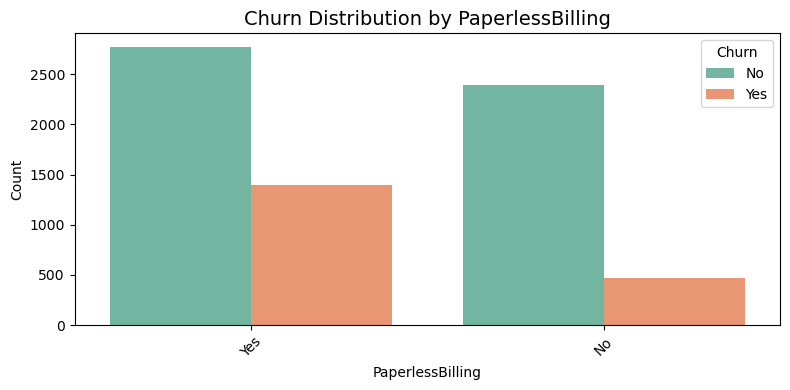

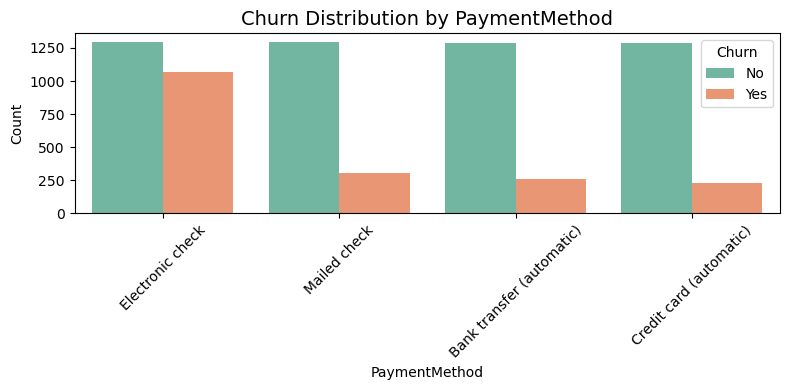

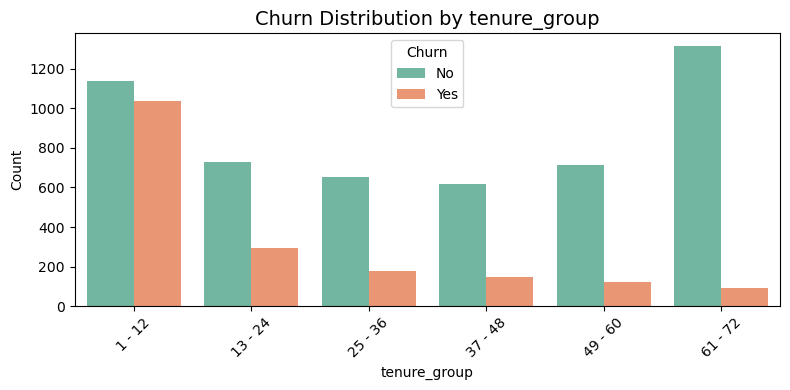

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop target and numeric columns for univariate categorical analysis
categorical_predictors = telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns

# Plot each categorical variable vs Churn
for i, predictor in enumerate(categorical_predictors):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=telco_data, x=predictor, hue='Churn', palette='Set2')
    plt.title(f'Churn Distribution by {predictor}', fontsize=14)
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [43]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [45]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**Relationship between Monthly Charges and Total Charges **

✅ Dataset converted. New shape: (7032, 35)


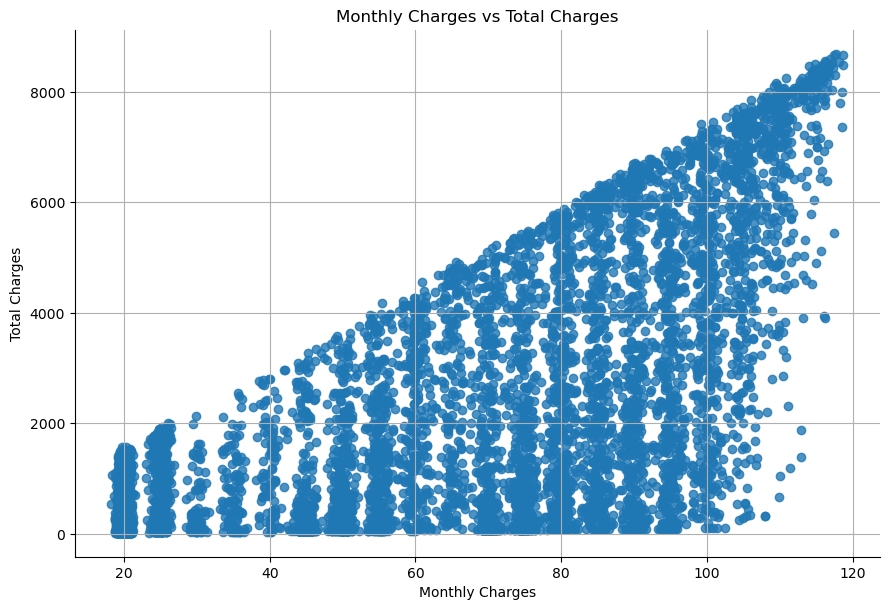

In [47]:

#  Convert categorical variables into dummy/indicator variables
telco_data_dummies = pd.get_dummies(telco_data, drop_first=True)
print(f"✅ Dataset converted. New shape: {telco_data_dummies.shape}")
telco_data_dummies.head()

# 2. Scatterplot of MonthlyCharges vs TotalCharges
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False, height=6, aspect=1.5)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()


Total Charges increase as Monthly Charges increase - as expected.

**10. ** Churn by Monthly Charges and Total Charges

/var/folders/b5/ky4fw8s575v06qzlyrxbp8bc0000gn/T/ipykernel_12205/1901832366.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies['MonthlyCharges'][telco_data_dummies["Churn"] == 0],
/var/folders/b5/ky4fw8s575v06qzlyrxbp8bc0000gn/T/ipykernel_12205/1901832366.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies['MonthlyCharges'][telco_data_dummies["Churn"] == 1],


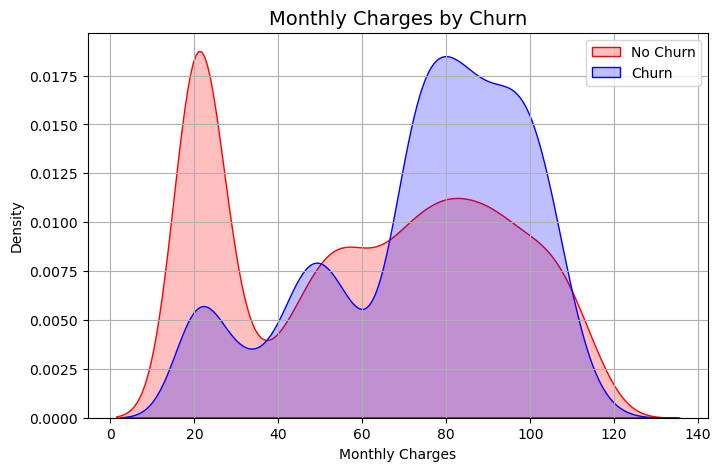

In [53]:

# Ensure Churn is binary (0 = No, 1 = Yes)
if 'Churn' in telco_data_dummies.columns and telco_data_dummies['Churn'].dtype != 'int':
    telco_data_dummies['Churn'] = telco_data_dummies['Churn'].astype(int)

# KDE plot for MonthlyCharges by Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(telco_data_dummies['MonthlyCharges'][telco_data_dummies["Churn"] == 0], 
            shade=True, color="red", label="No Churn")
sns.kdeplot(telco_data_dummies['MonthlyCharges'][telco_data_dummies["Churn"] == 1], 
            shade=True, color="blue", label="Churn")
plt.title("Monthly Charges by Churn", fontsize=14)
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


**Insight:** Churn is high when Monthly Charges ar high

/var/folders/b5/ky4fw8s575v06qzlyrxbp8bc0000gn/T/ipykernel_12205/3857115829.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies['TotalCharges'][telco_data_dummies["Churn"] == 0],
/var/folders/b5/ky4fw8s575v06qzlyrxbp8bc0000gn/T/ipykernel_12205/3857115829.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies['TotalCharges'][telco_data_dummies["Churn"] == 1],


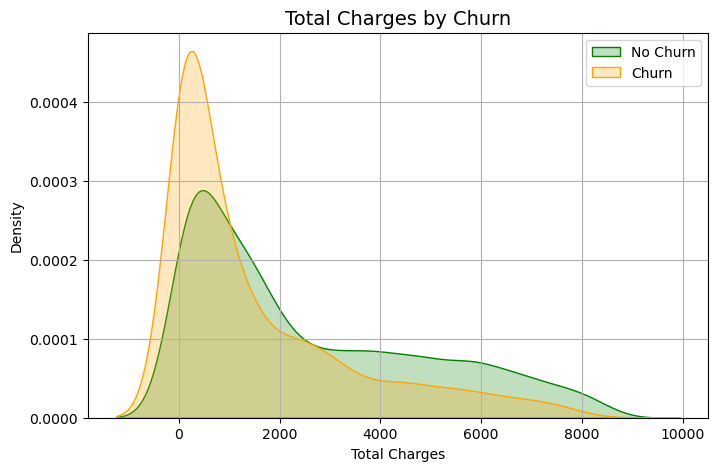

In [56]:
# KDE plot for TotalCharges by Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(telco_data_dummies['TotalCharges'][telco_data_dummies["Churn"] == 0], 
            shade=True, color="green", label="No Churn")
sns.kdeplot(telco_data_dummies['TotalCharges'][telco_data_dummies["Churn"] == 1], 
            shade=True, color="orange", label="Churn")
plt.title("Total Charges by Churn", fontsize=14)
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **

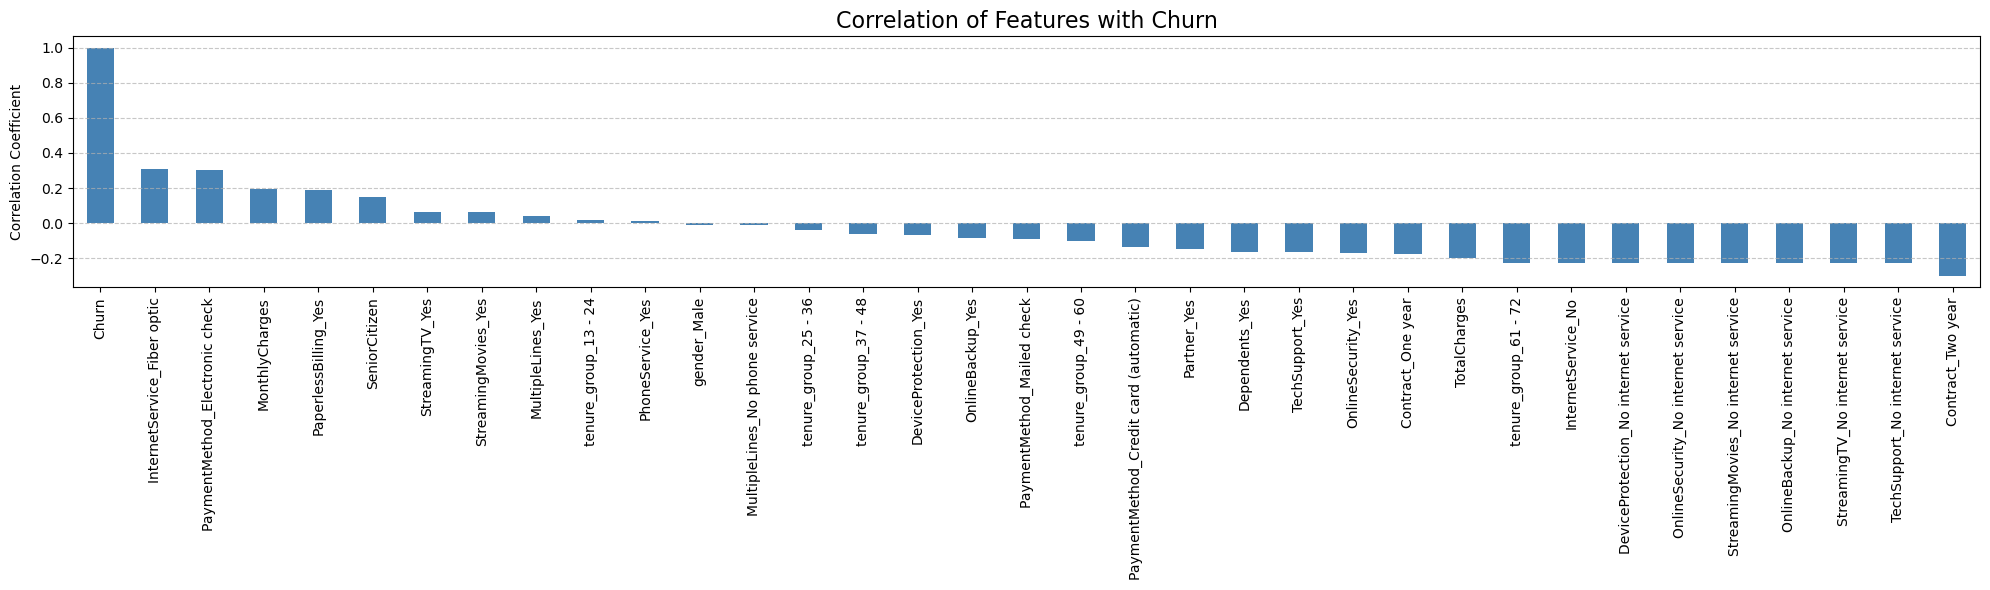

In [60]:
# Correlation with Churn
plt.figure(figsize=(20, 6))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Correlation of Features with Churn', fontsize=16)
plt.ylabel('Correlation Coefficient')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###  Correlation with Churn

**Derived Insight:**

- **HIGH** Churn is seen in case of:
  - **Month-to-month contracts**
  - **No online security**
  - **No Tech support**
  - **First year of subscription**
  - **Fibre Optics Internet**

- **LOW** Churn is observed in case of:
  - **Long-term contracts**
  - **Subscriptions without internet service**
  - **Customers engaged for 5+ years**

- Factors like **Gender**, **Availability of PhoneService**, and **Number of multiple lines** have almost **NO** impact on Churn.

This is also evident from the **Heatmap** below.


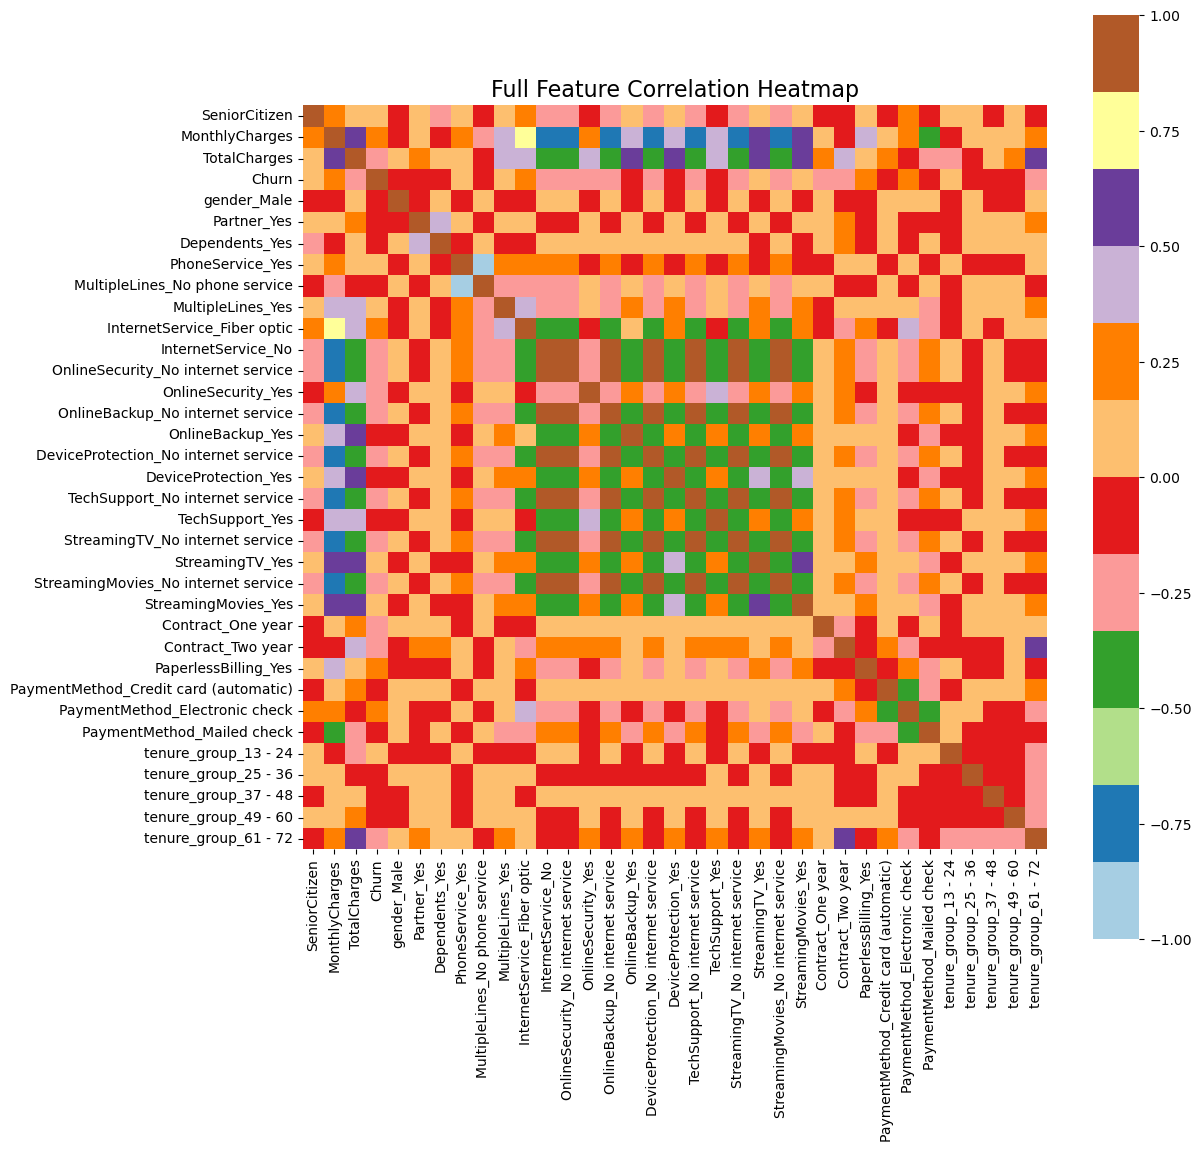

In [63]:
# Plotting full correlation heatmap of all features
plt.figure(figsize=(12, 12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired", annot=False, square=True)
plt.title('Full Feature Correlation Heatmap', fontsize=16)
plt.show()

### Bivariate Analysis

In [66]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [70]:
def uniplot(df, col, title, hue=None):

    # Set visual styles
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Adjust plot width based on unique categories
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)

    # Plot
    plt.xticks(rotation=45)
    plt.yscale('log')  # Apply log scale to Y-axis
    plt.title(title)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    plt.show()


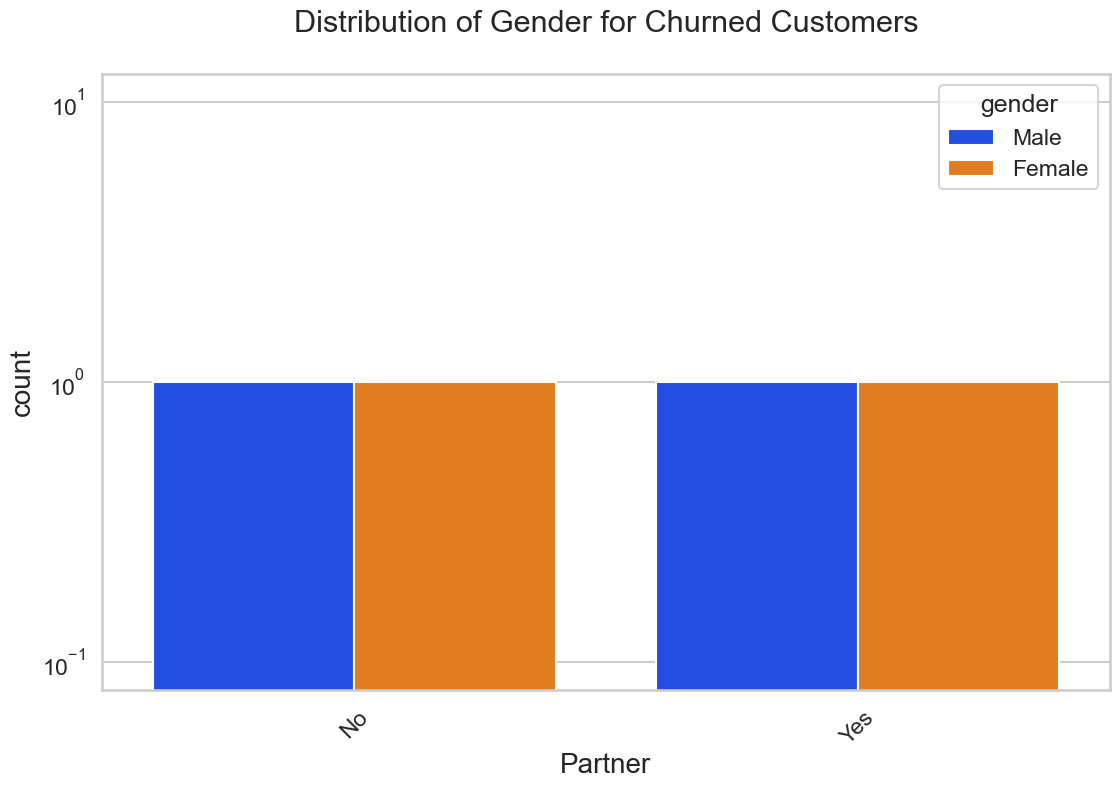

Numeric Features:
['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']


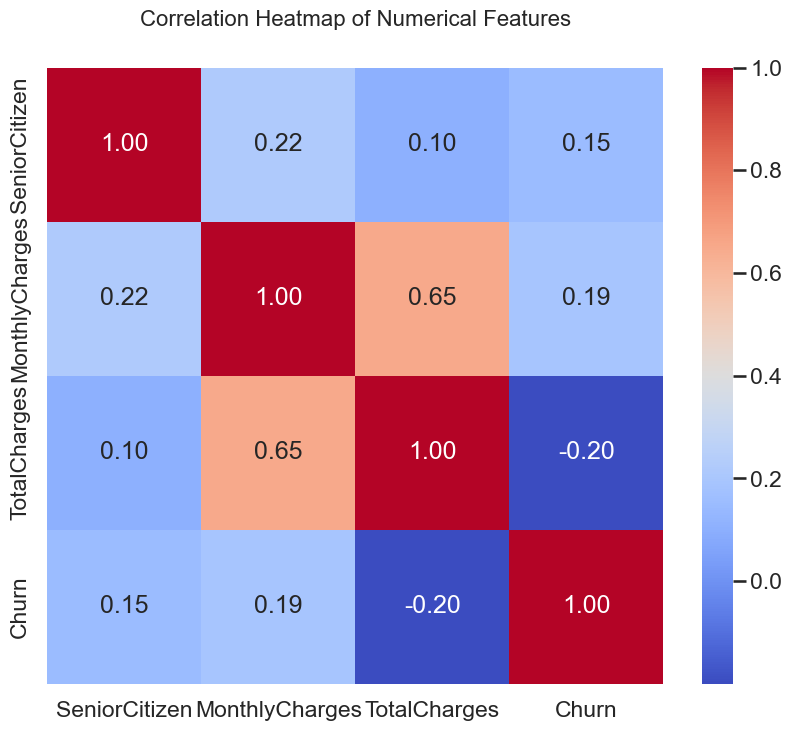

In [72]:
# 1. Visualize gender distribution for churned customers by partner status
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

# 2. Select only numeric columns from telco_data_dummies
numeric_features = telco_data_dummies.select_dtypes(include=['int64', 'float64']).columns
print(f"Numeric Features:\n{numeric_features.tolist()}")

# 3. Calculate and visualize correlation matrix
correlation_matrix = telco_data_dummies[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


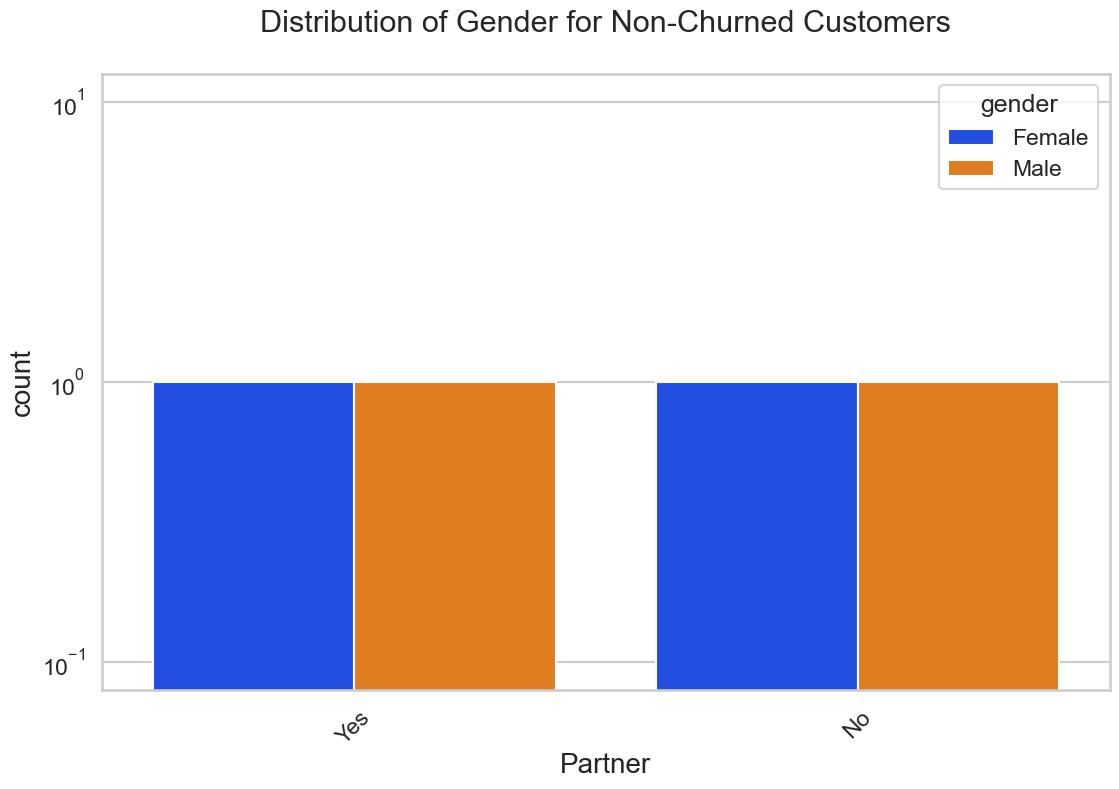

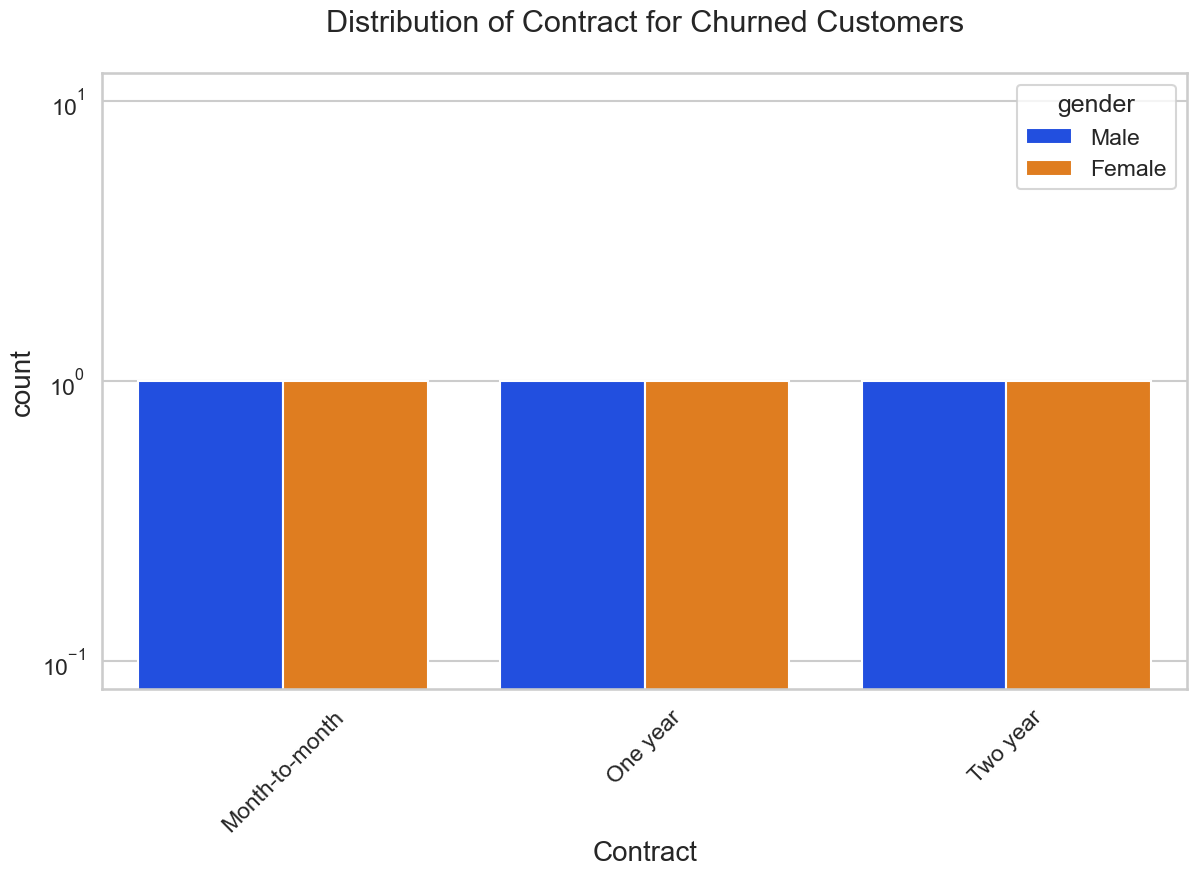

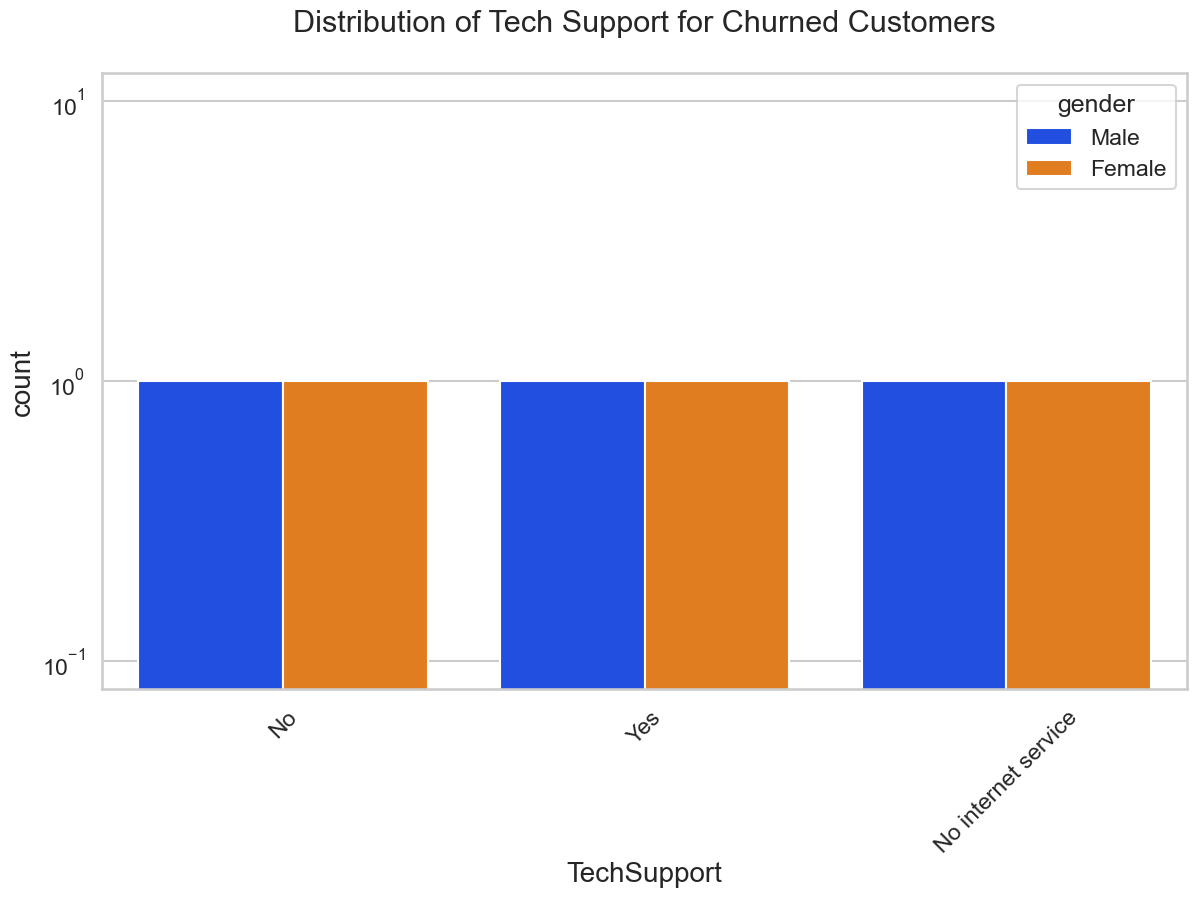

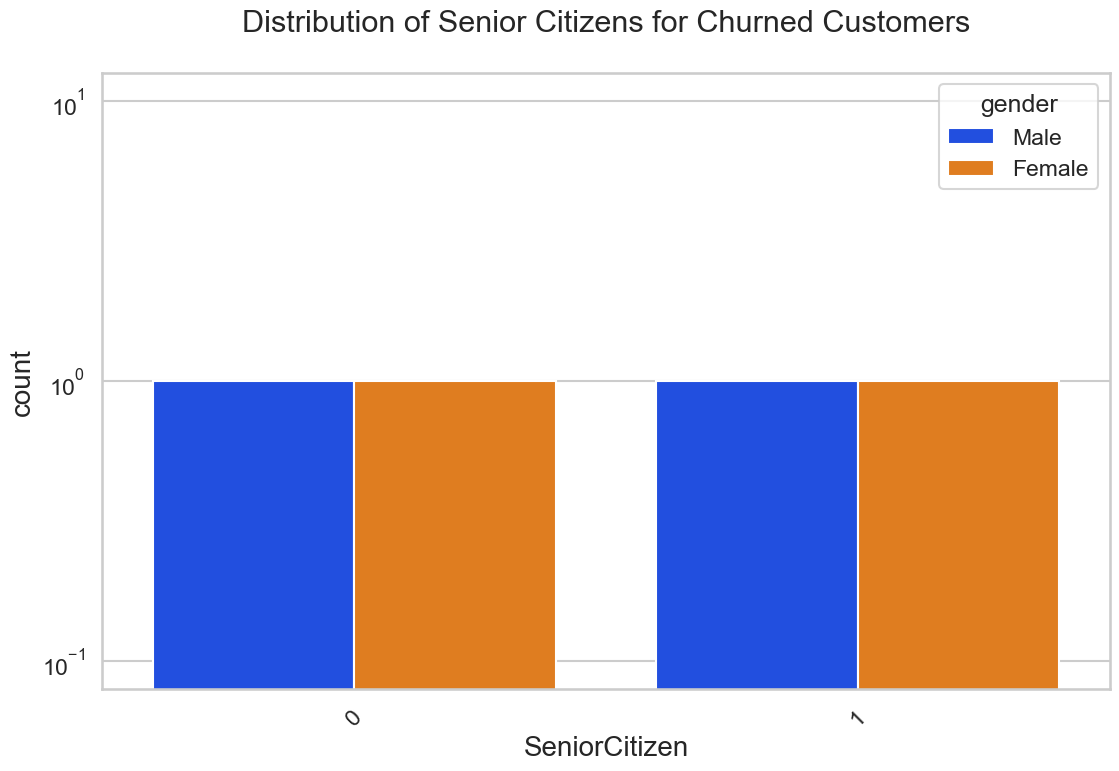

In [74]:
# Non-Churned Customers: Gender distribution by Partner status
uniplot(new_df1_target0, col='Partner', title='Distribution of Gender for Non-Churned Customers', hue='gender')

# Churned Customers: Gender distribution by Contract type
uniplot(new_df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

# Churned Customers: Gender distribution by Tech Support availability
uniplot(new_df1_target1, col='TechSupport', title='Distribution of Tech Support for Churned Customers', hue='gender')

# Churned Customers: Gender distribution by Senior Citizen status
uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of Senior Citizens for Churned Customers', hue='gender')


###  Conclusion

These are some of the quick insights from this exercise:

1. **Electronic check** payment method users are the highest churners.
2. **Monthly contract** customers are more likely to churn due to lack of commitment — they are "free-to-go" customers.
3. Customers with **No Online Security** and **No Tech Support** are high churners.
4. **Non-Senior Citizens** churn more compared to Senior Citizens.




In [77]:
telco_data_dummies.to_csv('tel_churn.csv')

### Importing Libraries

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn import metrics

# Load the preprocessed dataset
df = pd.read_csv("tel_churn.csv")
print("✅ Data Loaded Successfully")

# Drop unnamed index column (if exists)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Quick preview
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable distribution:\n{y.value_counts()}")

✅ Data Loaded Successfully
Feature matrix shape: (7032, 34)
Target variable distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


In [84]:
# 1. Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Decision Tree model
model_dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

# 3. Train the model
model_dt.fit(x_train, y_train)

# 4. Predict on test data
y_pred = model_dt.predict(x_test)

# 5. Accuracy score
print(f"Model Accuracy: {model_dt.score(x_test, y_test):.4f}")

# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=[0, 1]))


Model Accuracy: 0.7683

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.59      0.41      0.48       374

    accuracy                           0.77      1407
   macro avg       0.70      0.65      0.67      1407
weighted avg       0.75      0.77      0.75      1407



In [90]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Apply SMOTEENN to handle class imbalance
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X, y)
print("✅ Resampling complete. Class distribution after resampling:")
print(pd.Series(y_resampled1).value_counts())

# 2. Train-test split on resampled data
xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

# 3. Train Random Forest Classifier
model_rf_smote = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

model_rf_smote.fit(xr_train1, yr_train1)

# 4. Predict and evaluate
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

print(f"\nModel Accuracy: {model_score_r1:.4f}")
print("\nClassification Report:")
print(metrics.classification_report(yr_test1, yr_predict1))

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(yr_test1, yr_predict1))

✅ Resampling complete. Class distribution after resampling:
Churn
1    3138
0    2653
Name: count, dtype: int64

Model Accuracy: 0.9232

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       544
           1       0.91      0.95      0.93       615

    accuracy                           0.92      1159
   macro avg       0.93      0.92      0.92      1159
weighted avg       0.92      0.92      0.92      1159


Confusion Matrix:
[[483  61]
 [ 28 587]]


###### With the Random Forest Classifier, we were able to achieve quite strong performance — in fact, **better than the Decision Tree** model.

- The model achieved **92.32% accuracy**, with high precision and recall for both classes.
- **Class imbalance** was effectively handled using **SMOTEENN**, improving the model’s ability to generalize.

### Performing PCA

In [94]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# 1. Apply PCA to retain 90% variance
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

print(f"PCA reduced feature count from {xr_train1.shape[1]} to {xr_train_pca.shape[1]}")
print(f"Explained variance per component: {explained_variance}")

# 2. Train Random Forest on PCA-transformed data
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)
model.fit(xr_train_pca, yr_train1)

# 3. Predict and evaluate
yr_predict_pca = model.predict(xr_test_pca)
model_score_r_pca = model.score(xr_test_pca, yr_test1)

print(f"\n Accuracy with PCA: {model_score_r_pca:.4f}")
print("\n Classification Report:")
print(metrics.classification_report(yr_test1, yr_predict_pca))


PCA reduced feature count from 34 to 1
Explained variance per component: [0.99986118]

 Accuracy with PCA: 0.7299

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       544
           1       0.71      0.82      0.76       615

    accuracy                           0.73      1159
   macro avg       0.73      0.72      0.72      1159
weighted avg       0.73      0.73      0.73      1159



##### With PCA, we couldn't see any improvement in model performance.

Hence, we will **finalize the Random Forest model** trained on the SMOTEENN-resampled data **without PCA**, as it delivered the best overall results.

We’ll now save this model so it can be reused for predictions at a later stage. 


In [97]:
import pickle

# Save the trained model
filename = 'model.sav'
pickle.dump(model_rf_smote, open(filename, 'wb'))

# Load the saved model
load_model = pickle.load(open(filename, 'rb'))

# Evaluate loaded model on test set
model_score_r1 = load_model.score(xr_test1, yr_test1)

model_score_r1


0.9232096635030198

##### Our final model — the **Random Forest Classifier with SMOTEENN** — is now trained, evaluated, and saved as `model.sav`.

We will use this saved model to **build APIs**, allowing us to access the model's predictions from a **User Interface (UI)** or other applications.




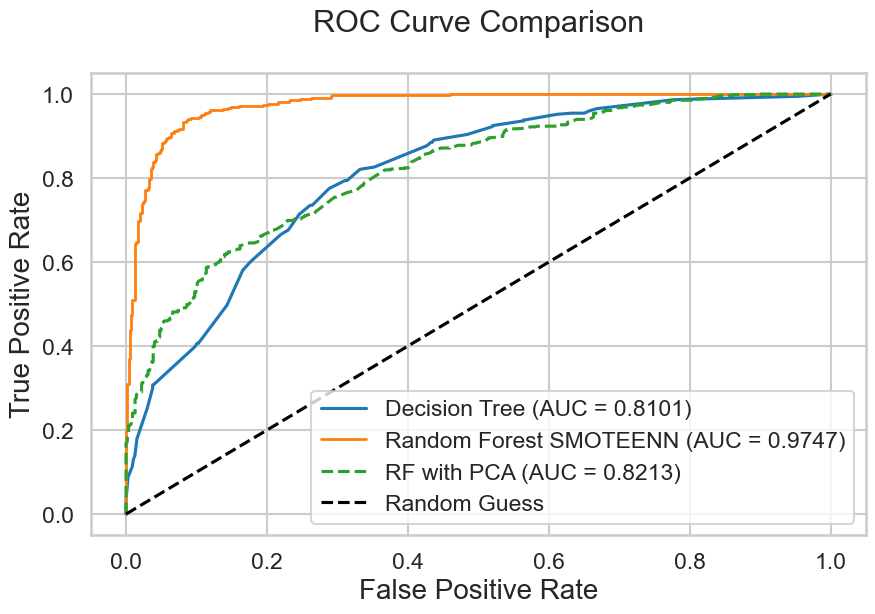

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get probabilities for all models (probability of class 1 = churn)
# Decision Tree
y_probs_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
auc_dt = roc_auc_score(y_test, y_probs_dt)

# Random Forest with SMOTEENN
y_probs_rf = model_rf_smote.predict_proba(xr_test1)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(yr_test1, y_probs_rf)
auc_rf = roc_auc_score(yr_test1, y_probs_rf)

#  PCA-transformed model:
y_probs_pca = model.predict_proba(xr_test_pca)[:, 1]
fpr_pca, tpr_pca, _ = roc_curve(yr_test1, y_probs_pca)
auc_pca = roc_auc_score(yr_test1, y_probs_pca)

# 2. Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest SMOTEENN (AUC = {auc_rf:.4f})", linewidth=2)
plt.plot(fpr_pca, tpr_pca, label=f"RF with PCA (AUC = {auc_pca:.4f})", linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


###  ROC Curve Comparison — Model Performance Evaluation

The ROC Curve above compares the performance of three models:

| Model                          | AUC Score |
|-------------------------------|-----------|
| ✅ Random Forest (SMOTEENN)    | **0.9747** |
| Decision Tree                 | 0.8101    |
| Random Forest with PCA        | 0.8213    |

####  Insights:

- The **Random Forest model with SMOTEENN** achieves the **highest AUC (0.9747)**, clearly outperforming other models. This indicates excellent class separability and confirms it as the best-performing model.
- The **Decision Tree model**, though simpler, achieves a reasonable AUC of **0.8101**, but lacks the complexity to capture deeper patterns in the data.
- The **Random Forest model using PCA** shows slightly better performance than Decision Tree (**AUC = 0.8213**), but still lags behind the SMOTEENN-enhanced version.
- The **"Random Guess" baseline** (black dashed line) is included for reference — all models significantly outperform this baseline, proving they provide valuable predictive power.

####  Conclusion:

The ROC comparison clearly shows that **Random Forest with SMOTEENN** is the most reliable model for customer churn prediction in this analysis.


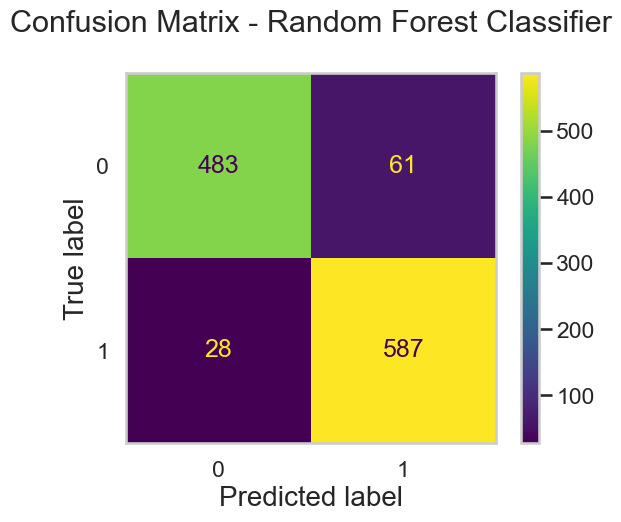

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       544
           1       0.91      0.95      0.93       615

    accuracy                           0.92      1159
   macro avg       0.93      0.92      0.92      1159
weighted avg       0.92      0.92      0.92      1159



In [103]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred = model_rf_smote.predict(xr_test1)

# Confusion Matrix
cm = confusion_matrix(yr_test1, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Random Forest Classifier")
plt.grid(False)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(yr_test1, y_pred))



- **True Negatives (483):** Non-churned customers correctly identified.
- **False Positives (61):** Non-churned customers incorrectly predicted as churned.
- **False Negatives (28):** Churned customers missed by the model.
- **True Positives (587):** Churned customers correctly predicted.

####  **Classification Report Summary**

| Metric       | Class 0 (No Churn) | Class 1 (Churn) |
|--------------|--------------------|------------------|
| Precision    | 0.95               | 0.91             |
| Recall       | 0.89               | 0.95             |
| F1-Score     | 0.92               | 0.93             |
| Support      | 544                | 615              |

- **Overall Accuracy:** `92%`
- **Macro Avg F1-Score:** `0.92` — average of both classes without considering imbalance
- **Weighted Avg F1-Score:** `0.92` — accounts for class imbalance

####  **Insights**
- The model is highly effective at identifying churned customers (recall = 95%), which is crucial for proactive customer retention.
- Non-churned customers are slightly more likely to be misclassified (FP = 61), but with high precision and F1.
- Balanced precision and recall indicate a robust classifier with minimal bias.

This performance confirms that **Random Forest with SMOTEENN** is a strong final model for deployment.


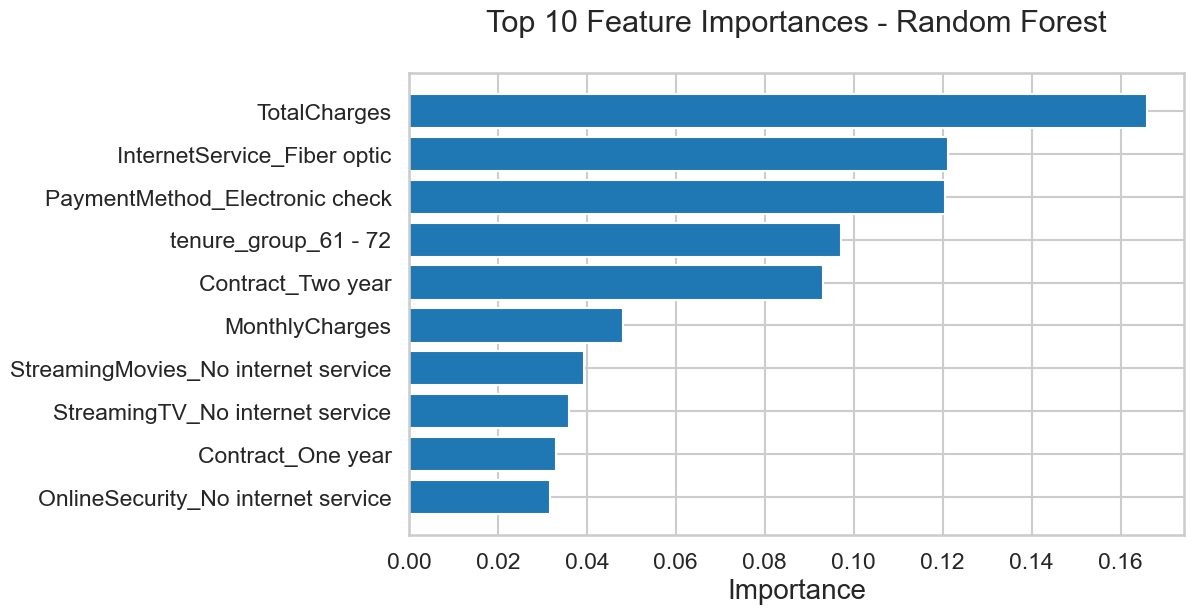

In [105]:

import pandas as pd
import numpy as np

# Extract feature importances
importances = model_rf_smote.feature_importances_
features = xr_train1.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


###  Feature Importance — Random Forest Classifier

The bar chart above shows the **top 10 features** that contributed most to predicting customer churn using the Random Forest Classifier.

#### Key Features Driving Churn Predictions:

1. **TotalCharges** — The most influential feature; customers with lower lifetime billing amounts tend to churn more.
2. **InternetService_Fiber optic** — Customers using fiber optic internet are more likely to churn compared to others.
3. **PaymentMethod_Electronic check** — Electronic check users have a high churn rate, possibly due to limited automation.
4. **tenure_group_61 - 72** — Longer-tenure customers (5+ years) are less likely to churn, hence highly important.
5. **Contract_Two year** — Long-term contracts correlate strongly with customer retention.
6. **MonthlyCharges** — Higher monthly charges often relate to increased churn risk.
7. **StreamingMovies_No internet service** — Those without streaming movie access via internet tend to churn differently.
8. **StreamingTV_No internet service** — Similarly, this feature adds insight into bundled service behavior.
9. **Contract_One year** — A less influential but still relevant indicator of reduced churn.
10. **OnlineSecurity_No internet service** — Lack of security service (or access to it) correlates to higher churn likelihood.

####  Conclusion:

The model relies heavily on **payment behavior**, **internet service type**, and **contract length** to distinguish churners from loyal customers. These insights can help the business target **retention strategies** like offering security add-ons, contract incentives, or fiber plan upgrades.


## Final Conclusion

This project successfully built a robust machine learning pipeline to **predict customer churn** in a telecom company using the Telco Customer Churn dataset.

###  Key Takeaways:

- **Data Preprocessing** included handling missing values, feature engineering (tenure grouping), and one-hot encoding categorical variables.
- **SMOTEENN** was used to address class imbalance, significantly improving model performance.
- Multiple models were tested:
  - **Decision Tree** served as a baseline.
  - **Random Forest with SMOTEENN** emerged as the best model with:
    - **Accuracy:** 92.32%
    - **AUC:** 0.9747
    - **Precision/Recall:** Balanced for both classes
- **PCA** was applied for dimensionality reduction but didn’t outperform the full-feature Random Forest model.

### Performance Evaluation:

- Confusion matrix and classification reports confirmed strong recall and precision.
- ROC curve analysis highlighted Random Forest with SMOTEENN as the most effective classifier.
- Feature importance analysis revealed that **TotalCharges**, **Fiber Optic Internet**, **Electronic Check Payments**, and **Contract Duration** were key churn indicators.

###  Final Output:

- The final model was saved as `model.sav` and is ready for deployment via APIs.
- This model can now be integrated into a **user-facing application** or backend system for real-time churn prediction and customer retention strategies.

---

### 🚀 Next Steps:

- Deploy the model via Flask or FastAPI
- Automate periodic retraining using new customer data
- Build dashboards to visualize churn trends in real-time

